In [39]:
import nltk
import gensim
from gensim.models.doc2vec import Doc2Vec

first_elements=10

docs=Doc2Vec.load("doc2vec.bin")
newdoc=[]
for doc in docs.docvecs:
   newdoc.append(doc) 
Y = tsne.fit_transform(newdoc)

newdoc[:first_elements]

[array([-0.000927  , -0.00098236, -0.00052298,  0.00150237, -0.00151964,
         0.00054188,  0.00098373,  0.00031855,  0.00055619, -0.00125016,
        -0.00026872,  0.00071434,  0.00090731,  0.00145316, -0.00093187,
        -0.00009932, -0.00041771,  0.00132375,  0.00033158,  0.00091443,
         0.00013764,  0.00073089, -0.00000334,  0.00103094,  0.00008211,
         0.0001517 ,  0.00086828, -0.00091752,  0.00156985, -0.00123979,
         0.00128495,  0.00147363, -0.00026912,  0.00036203,  0.00090826,
        -0.00118059, -0.00137675,  0.0010933 ,  0.00068645, -0.0014074 ,
        -0.00155999, -0.00086054,  0.00079465, -0.00001636,  0.00047089,
         0.0005721 ,  0.00004361,  0.00142355, -0.00018528,  0.0009788 ,
        -0.00102182,  0.00054023,  0.00002101,  0.00056631, -0.00102946,
         0.00147171,  0.00090269, -0.00142071,  0.0000376 ,  0.00063715,
        -0.00118344, -0.00063218, -0.00111284,  0.00086352,  0.00030965,
         0.00066598, -0.00034476, -0.0010827 , -0.0

In [45]:
import sys
import codecs
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


from sklearn.manifold import TSNE
 

    
df = pd.read_csv("data/articles.csv")
titles=df.Abstract.tolist()[:first_elements]
titles=[title[:10] for title in titles]
titles

['Chitosan-b',
 'The deposi',
 'Biphasic c',
 'Cell sheet',
 'Phase form',
 'Tissue-spe',
 'Urethral s',
 'Chitosan s',
 'The proces',
 'A method f']

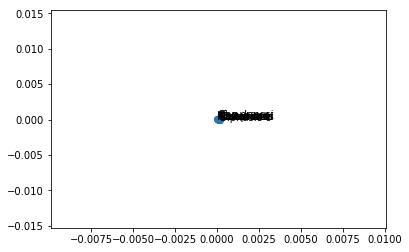

In [46]:

tsne = TSNE(n_components=2, random_state=0)
np.set_printoptions(suppress=True)
Y = tsne.fit_transform(newdoc[:10])
plt.scatter(Y[:, 0], Y[:, 1])
for label, x, y in zip(titles, Y[:, 0], Y[:, 1]):
    plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points')
plt.show()
 